In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras   
from keras.layers import Flatten,Dense,MaxPooling2D,Dropout,Conv2D
from keras.models import Sequential
from sklearn.metrics import accuracy_score

In [28]:
import ipywidgets as widgets
import io,os
from PIL import Image
import tqdm

In [29]:
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle

### Folder path

In [30]:
X_train=[]
y_train=[]
image_size=150
labels=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for i in labels:
    folderpath=os.path.join("D:\Brain Tumar Detection\Training",i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i) 




for i in labels:
    folderpath=os.path.join("D:\Brain Tumar Detection\Testing",i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i) 
X_train=np.array(X_train)
y_train=np.array(y_train)

In [31]:
X_train,y_train=shuffle(X_train,y_train,random_state=101)

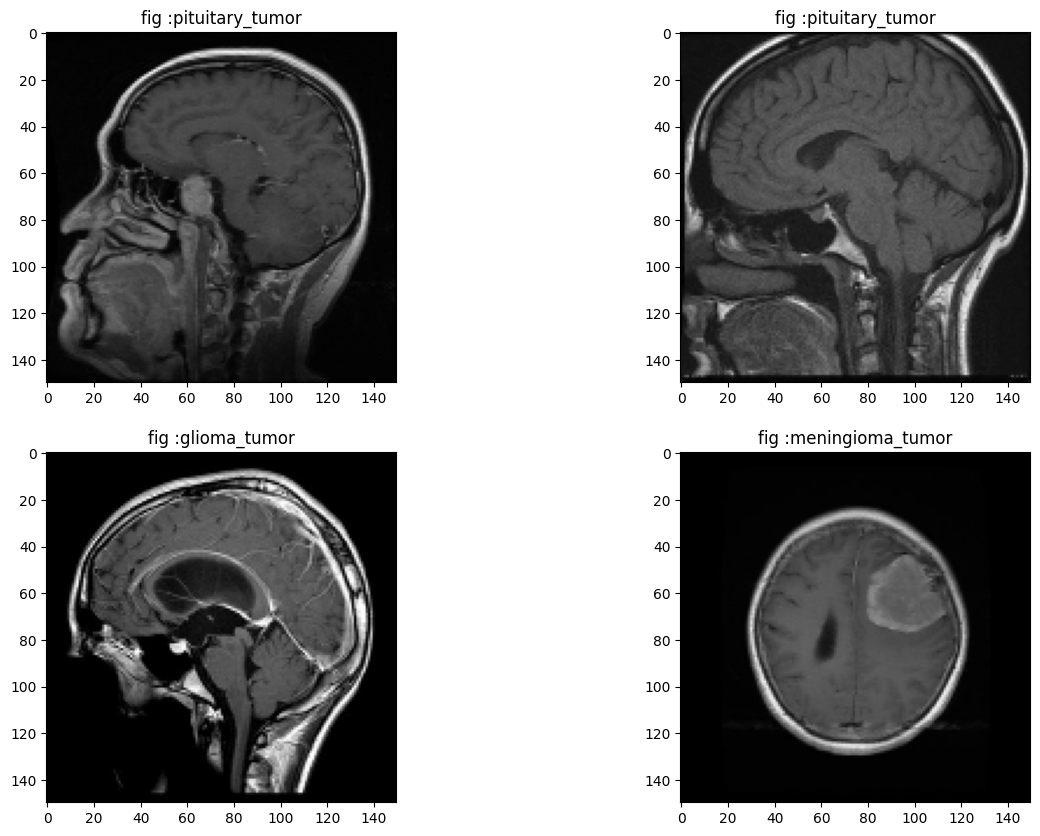

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(X_train[1])
plt.title(f"fig :{ y_train[1] }")
# plt.show() 

plt.subplot(2,2,2)
plt.imshow(X_train[2222])
plt.title(f"fig :{ y_train[2222] }")
# plt.show()

plt.subplot(2,2,3)
plt.imshow(X_train[40])
plt.title(f"fig :{ y_train[40] }")
# plt.show()

plt.subplot(2,2,4)
plt.imshow(X_train[400])
plt.title(f"fig :{ y_train[400] }")
plt.show()

In [33]:
X_train.shape

(3264, 150, 150, 3)

### Train Test Split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,random_state=101)

In [35]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)



In [37]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

### CNN Architecture:-

In [38]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))




model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))



model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))




model.add(Dense(4,activation="softmax"))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [40]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [45]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 195s 2s/step - loss: 2.7379 - accuracy: 0.3269 - val_loss: 1.2751 - val_accuracy: 0.4796
Epoch 2/20
83/83 [==============================] - 197s 2s/step - loss: 1.1377 - accuracy: 0.5146 - val_loss: 1.0865 - val_accuracy: 0.5068
Epoch 3/20
83/83 [==============================] - 190s 2s/step - loss: 0.9905 - accuracy: 0.5823 - val_loss: 0.9799 - val_accuracy: 0.5646
Epoch 4/20
83/83 [==============================] - 211s 3s/step - loss: 0.9005 - accuracy: 0.6220 - val_loss: 0.8150 - val_accuracy: 0.6259
Epoch 5/20
83/83 [==============================] - 190s 2s/step - loss: 0.7186 - accuracy: 0.6928 - val_loss: 0.7722 - val_accuracy: 0.6803
Epoch 6/20
83/83 [==============================] - 192s 2s/step - loss: 0.6273 - accuracy: 0.7420 - val_loss: 0.5565 - val_accuracy: 0.8095
Epoch 7/20
83/83 [==============================] - 193s 2s/step - loss: 0.5284 - accuracy: 0.7942 - val_loss: 0.5725 - val_accuracy: 0.7959
Epoch 8/20
83

In [46]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.737901,0.326901,1.275114,0.479592
1,1.137676,0.514567,1.086504,0.506803
2,0.990487,0.582293,0.979903,0.564626
3,0.900458,0.622020,0.815012,0.625850
4,0.718567,0.692773,0.772244,0.680272
5,0.627272,0.741960,0.556458,0.809524
6,0.528430,0.794173,0.572529,0.795918
7,0.537829,0.778661,0.586776,0.758503
8,0.429525,0.838063,0.499588,0.819728
9,0.395387,0.849035,0.423841,0.843537


<Axes: >

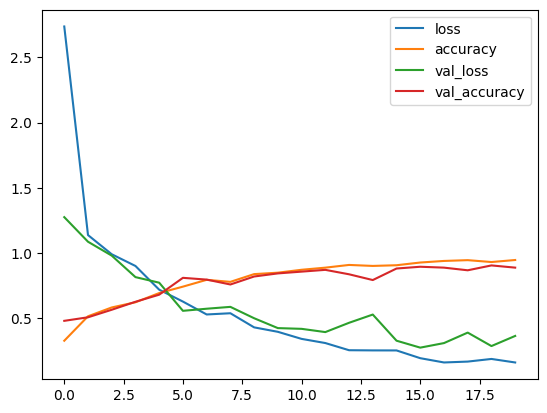

In [47]:
pd.DataFrame(history.history).plot()

In [52]:
model.save("D:\Brain Tumar Detection\\model\\tumar.h5")

### Predection:- 

In [65]:
img=cv2.imread("D:\Brain Tumar Detection\Testing\pituitary_tumor\image(13).jpg")
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

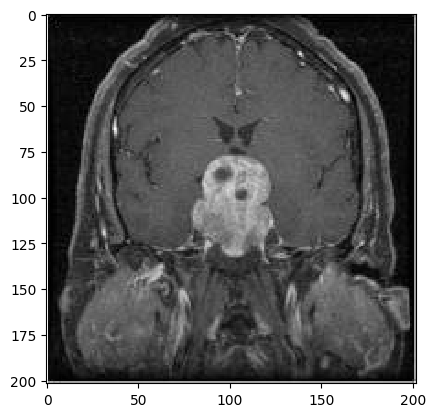

In [66]:
from tensorflow.keras.preprocessing import image
img=image.load_img("D:\Brain Tumar Detection\Testing\pituitary_tumor\image(13).jpg")
plt.imshow(img,interpolation="nearest")
plt.show()

In [67]:
a=model.predict(img_array)
indices=a.argmax()
indices

1/1 [==============================] - 0s 274ms/step


3

In [68]:
if(indices==0):
    print("Glioma Tumor")
elif(indices==1):
    print("Meningioma Tumor")
elif(indices==2):
    print("No Tumor")
elif(indices==3):
    print("Pituitary Tumor")

Pituitary Tumor
